In [1]:
import requests
import torch
from transformers import pipeline
from transformers import AutoProcessor, AutoModelForCausalLM 
# optimize with fp16 loading
model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large-ft", trust_remote_code=True, torch_dtype=torch.float16).to(torch.cuda.current_device())
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large-ft", trust_remote_code=True)


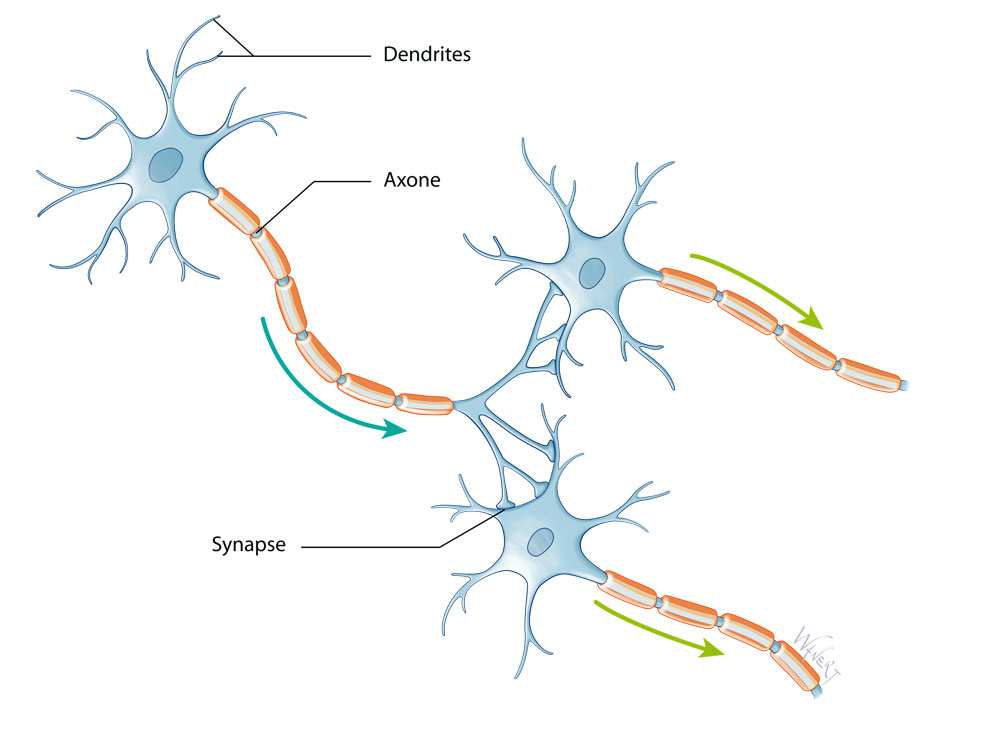

In [11]:
image = Image.open("./data/bbe3b37e-86aa-4371-a75e-fded6ef4e0c4.png")
display(image)


In [12]:
from PIL import Image
import time

def run_florence_2(image, task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt").to(torch.cuda.current_device(), dtype=torch.float16)
    generated_ids = model.generate(
      input_ids=inputs["input_ids"],
      pixel_values=inputs["pixel_values"],
      max_new_tokens=1024,
      num_beams=1
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

    parsed_answer = processor.post_process_generation(generated_text, task=task_prompt, image_size=(image.width, image.height))
    return parsed_answer

start_time = time.time()

# for i in range(10):
caption = run_florence_2(image, "<MORE_DETAILED_CAPTION>", text_input="")
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")
print(caption)

Time taken: 0.399869441986084 seconds
{'<MORE_DETAILED_CAPTION>': 'A diagram of a network of cell structures. It shows the structure of the cell structures as shown by the arrows.  The cell structures are shown as dendrites, axone, synapse, and wheat.  There are also dendrite and dendrites as well as synapse.'}
